In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="gfdg")
import folium
from folium import plugins
from folium.plugins import HeatMap
from PIL import Image
from selenium import webdriver

import time


In [12]:
my_map = folium.Map(location=[51.5074, 0.1278],
                    zoom_start = 5) # for UK 

df_cities=pd.read_csv("local_lat_long.csv")
df_cities.fillna(0,inplace=True)
for idx,row in df_cities.iterrows():
    # folium.Marker( location=[ (row["Latitude"]), (row["Longitude"]) ], fill_color='red', radius=1 ).add_to( my_map )
    folium.CircleMarker(location=[ (row["Latitude"]), (row["Longitude"]) ],
                        radius=1,
                        weight=5).add_to(my_map)
my_map

In [3]:
def get_latitude(place):
    el=geolocator.geocode(place)
    if el is not None:
        if 50<el.latitude<60:
            return el.latitude

    else:
        print(place)
def get_longitude(place):
    el=geolocator.geocode(place)
    if el is not None:
        if -8<el.longitude<3:
    
            return el.longitude  

In [4]:



# df= pd.read_csv("../../preprocessing/raw_data/demand/Subnational_electricity_consumption_statistics_2017.csv")

# df = df[['Local Authority']].copy()

# df["Latitude"]=df["Local Authority"].apply(lambda local: get_latitude(local+" UK"))
# df["Longitude"]=df["Local Authority"].apply(lambda local: get_longitude(local+" UK"))


# df = pd.DataFrame(
#     {'City': ['London', 'Manchester', 'Birmingham', 'Bath', 'Woking'],
#      'Country': ['UK', 'UK', 'UK', 'UK', 'UK'],
#      'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
#      'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})




In [5]:
# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

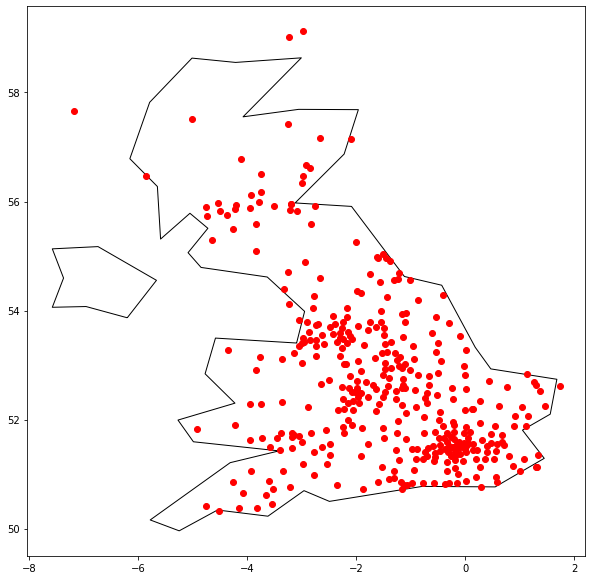

,Local Authority,Latitude,Longitude,Country,geometry
0,Hartlepool,54.685728,-1.209370,United Kingdom,POINT (-1.20937 54.68573)
1,Middlesbrough,54.576042,-1.234405,United Kingdom,POINT (-1.23440 54.57604)
2,Redcar and Cleveland,54.567906,-1.005496,United Kingdom,POINT (-1.00550 54.56791)
3,Stockton-on-Tees,54.564094,-1.312916,United Kingdom,POINT (-1.31292 54.56409)
4,Darlington,54.524208,-1.555581,United Kingdom,POINT (-1.55558 54.52421)


In [6]:
df_cities=pd.read_csv("lat_long.csv")
#df_cities = df_cities[df_cities["Local Authority"]=="Liverpool"]


df_cities["Country"]="United Kingdom"

del df_cities['Unnamed: 0']
gdf = geopandas.GeoDataFrame(
    df_cities, geometry=geopandas.points_from_xy(df_cities.Longitude, df_cities.Latitude))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# We restrict to South America.
ax = world[world.name  == 'United Kingdom'].plot(
   color='white', edgecolor='black' , figsize=(10,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot( color='red',ax=ax)

plt.show( )
gdf.head()




In [7]:
supply_demand_dict={
 "Greater London-Heathrow":'Outer London',
 "Devon-Exeter":'East Devon',
 "Cornwall-Cardinham Bodmin":'Cornwall',
 "Greater London-Kew Gardens":'City of London',
 "Wiltshire-Lyneham":'Wiltshire',
 "Greater London-Kenley":'Outer London',
 "Kent-Manston":'South East',
 "Dorset-Hurn":'Dorset',
 "Goucestershire-Little Rissington":'South Gloucestershire',
 "Somerset-Yeovilton":'Bath and North East Somerset',
 "Cornwall-Camborne":'Cornwall',
 "Kent-East Malling":'South East',
 "Surrey-Wisley":'Surrey Heath',
 "Hampshire-Odiham":'East Hampshire',
 "Somerset-Liscombe":'Bath and North East Somerset',
}

supply_df=pd.DataFrame(columns=("Country","City","Latitude","Longitude"))
demand_df=pd.DataFrame(columns=("Country","City","Latitude","Longitude"))

i=0
for supply in supply_demand_dict:
    print(supply)


    supply_df.loc[i]=["UK",supply,get_latitude(supply),get_longitude(supply)]
    demand_df.loc[i]=["UK",supply_demand_dict[supply],get_latitude(supply_demand_dict[supply]),get_longitude(supply_demand_dict[supply])]

    i+=1



Greater London-Heathrow
Devon-Exeter
Cornwall-Cardinham Bodmin
Greater London-Kew Gardens
Wiltshire-Lyneham
Greater London-Kenley
Kent-Manston
Dorset-Hurn
Goucestershire-Little Rissington
Goucestershire-Little Rissington
Somerset-Yeovilton
Cornwall-Camborne
Kent-East Malling
Surrey-Wisley
Hampshire-Odiham
Somerset-Liscombe


   Country                              City   Latitude  Longitude  \
0       UK           Greater London-Heathrow  51.467739  -0.458780   
1       UK                      Devon-Exeter  50.725579  -3.526950   
2       UK         Cornwall-Cardinham Bodmin  50.500628  -4.666728   
3       UK        Greater London-Kew Gardens  51.478126  -0.296934   
4       UK                 Wiltshire-Lyneham  51.507577  -1.964673   
5       UK             Greater London-Kenley  51.322752  -0.103785   
6       UK                      Kent-Manston  51.345996   1.369675   
7       UK                       Dorset-Hurn  50.838622  -1.805408   
8       UK  Goucestershire-Little Rissington        NaN        NaN   
9       UK                Somerset-Yeovilton  51.019700  -2.649445   
10      UK                 Cornwall-Camborne  50.213883  -5.299035   
11      UK                 Kent-East Malling  51.285671   0.440360   
12      UK                     Surrey-Wisley  51.320267  -0.464729   
13      UK          

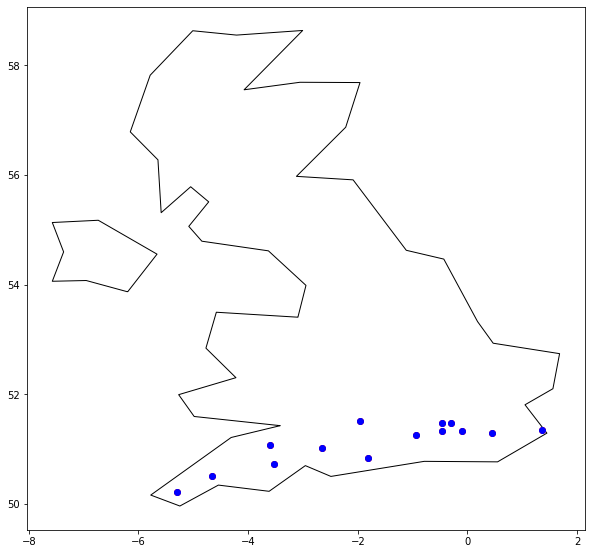

In [8]:



supply_gdf = geopandas.GeoDataFrame(
    supply_df, geometry=geopandas.points_from_xy(supply_df.Longitude, supply_df.Latitude))

demand_gdf = geopandas.GeoDataFrame(
    demand_df, geometry=geopandas.points_from_xy(supply_df.Longitude, supply_df.Latitude))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name  == 'United Kingdom'].plot(
   color='white', edgecolor='black' , figsize=(10,15))

# We can now plot our ``GeoDataFrame``.
supply_gdf.plot( color='red',ax=ax)
demand_gdf.plot( color='blue',ax=ax)

# plt.show( )
print(supply_gdf)
print(demand_gdf)
supply_gdf.to_csv("local_lat_long.csv",index=False)